# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
food = pd.read_csv('data/nutrition.csv')

In [3]:
nutrition_cols = ['Calories', 'Protein', 'Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']

for col in nutrition_cols:
    food[f'{col}'] = food[col].str.extract("(\d+.\d+)").astype(float)

food['tags'] = food['Item'].apply(lambda x: x.split(','))

In [4]:
food.describe()

,FDC_ID,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
count,"7,793.00","7,793.00","7,793.00","7,793.00","7,793.00","7,394.00","7,231.00","7,793.00","5,399.00","7,332.00"
mean,"171,408.00",220.24,11.93,19.57,10.69,45.05,1.98,56.03,0.18,8.98
std,"2,249.79",168.75,10.86,25.71,16.38,126.33,4.31,29.49,1.97,68.04
min,"167,512.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"169,460.00",91.00,2.27,0.00,0.80,0.00,0.00,38.14,0.00,0.00
50%,"171,408.00",183.00,8.98,7.60,5.06,8.00,0.30,64.16,0.00,0.00
75%,"173,356.00",317.00,20.77,27.12,13.50,71.00,2.30,77.96,0.00,3.20
max,"175,304.00",902.00,88.32,100.00,100.00,"3,100.00",79.00,100.00,42.50,"2,732.00"


# Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

## Highest vitamin C content

In [5]:
df = food.copy()
fruits = food[(food['Category'] == 'Fruits and Fruit Juices')]
fruits.sort_values(by = 'Vitamin C', ascending = False).dropna(subset=['Vitamin C']).iloc[:1]

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,tags
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,32.00,0.40,7.69,0.30,0.00,1.10,91.41,0.00,"1,677.60","[Acerola, (west indian cherry), raw]"


## What are some other sources of vitamin C

In [6]:
df = food.sort_values(by = 'Vitamin C', ascending = False).dropna(subset=['Vitamin C'])
df = df[df['Vitamin C'] > 0]
df.head(10)[df.columns[:-1]]

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
3449,173487,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",Baby Foods,64.00,1.10,14.82,0.00,2.00,1.20,83.83,0.00,"2,732.00"
2316,173237,"Beverages, Orange-flavor drink, breakfast type...",Beverages,217.00,3.60,85.90,0.00,0.00,3.80,1.80,0.00,"2,400.00"
2140,167707,"Beverages, fruit-flavored drink, powder, with ...",Beverages,227.00,0.25,91.00,0.16,0.00,2.20,1.32,0.00,"2,400.00"
1454,169373,"Peppers, sweet, red, freeze-dried",Vegetables and Vegetable Products,314.00,17.90,68.70,3.00,0.00,21.30,2.00,0.00,"1,900.00"
5220,171686,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,32.00,0.40,7.69,0.30,0.00,1.10,91.41,0.00,"1,677.60"
5221,171687,"Acerola juice, raw",Fruits and Fruit Juices,23.00,0.40,4.80,0.30,0.00,0.30,94.30,0.00,"1,600.00"
2373,174143,"Beverages, tea, green, instant, decaffeinated,...",Beverages,378.00,0.00,94.45,0.00,0.00,0.00,5.09,0.00,"1,342.30"
1619,170075,"Chives, freeze-dried",Vegetables and Vegetable Products,311.00,21.20,64.29,3.50,0.00,26.20,2.00,0.00,660.00
7016,170921,"Spices, coriander leaf, dried",Spices and Herbs,279.00,21.93,52.10,4.78,0.00,10.40,7.30,0.00,566.70
2139,167681,"Beverages, fruit-flavored drink, dry powdered ...",Beverages,218.00,0.45,87.38,0.04,0.00,0.10,1.84,0.00,560.00


# Describe the relationship between the calories and water content of a food item.

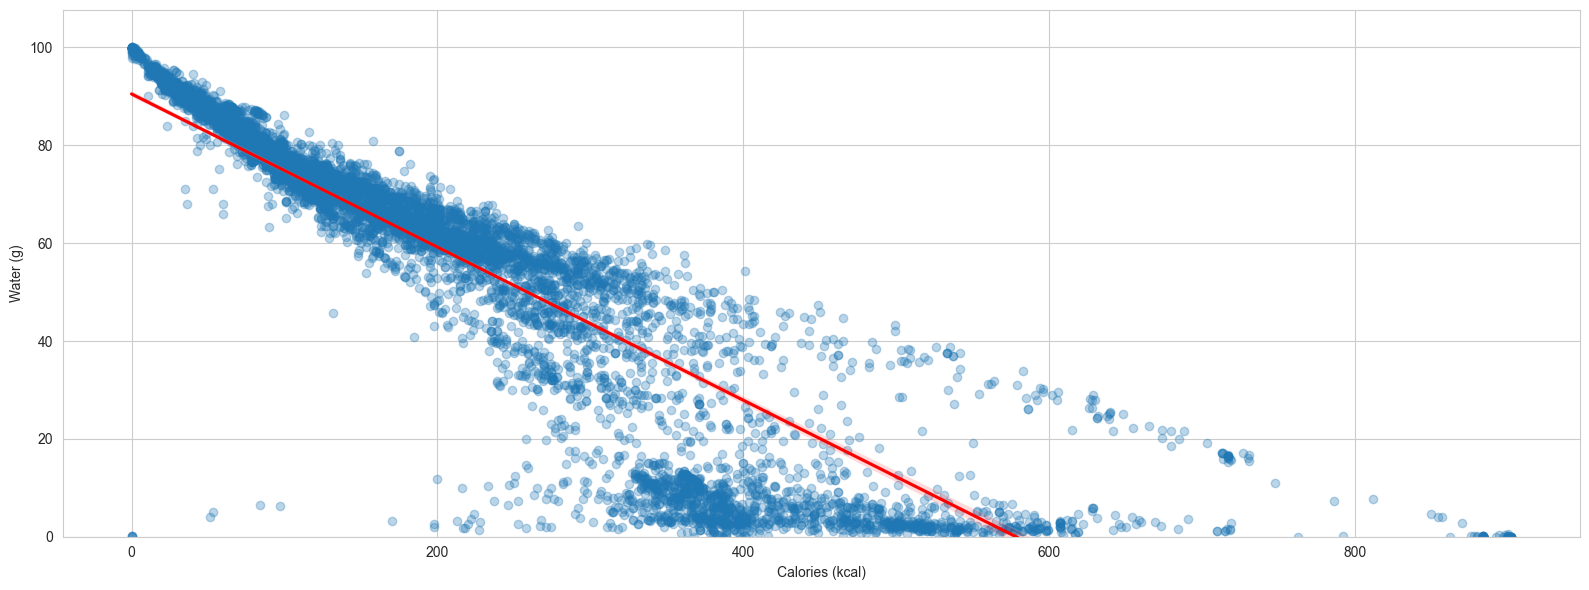

In [7]:
plt.figure(figsize = (16,6))
df = food[['Item','Calories', 'Water']]

sns.regplot(data = df, x = 'Calories', y = 'Water', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Calories (kcal)")
plt.ylabel("Water (g)")
plt.ylim(0)
plt.tight_layout()

In [8]:
# Correlation between Calories and Water
df.corr(numeric_only = True).iloc[0][1]

-0.8954571656706287

In [9]:
X = df['Calories']
y = df['Water']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Water   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 3.153e+04
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        07:34:07   Log-Likelihood:                -31122.
No. Observations:                7793   AIC:                         6.225e+04
Df Residuals:                    7791   BIC:                         6.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.4994      0.245    370.088      0.000      90.020      90.979
Calories      -0.1565      0.001   -177.557      0.000      -0.158      -0.155
==============================================================================
Omnibus:                      950.637   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7083.278
Skew:                          -0.339   Prob(JB):                         0.00
Kurtosis:                       7.621   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
cals = 400
prediction = np.array(model.params.values).dot(np.array([1, cals]))
prediction

27.903227175709183

# What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

## Zero-carb diet

In [11]:
df = food[food['Calories'] == 0]

# median values of items with zero-carbs
df.groupby('Category')[nutrition_cols].median()

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
Category,,,,,,,,,
Baby Foods,0.00,0.00,0.00,0.00,0.00,0.00,99.90,0.00,0.00
Baked Products,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00
Beverages,0.00,0.00,0.00,0.00,0.00,0.00,99.90,0.00,0.00
Spices and Herbs,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00
Sweets,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00


## High-protein diet

In [12]:
df = food.copy()
threshold = 0.95
df = df.sort_values(by = 'Protein', ascending = False)
df = df[df['Protein'] > df['Protein'].quantile(threshold)]
df.groupby('Category')[nutrition_cols].median().fillna(0)

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
Category,,,,,,,,,
American Indian/Alaska Native Foods,312.00,56.19,0.00,7.26,122.00,0.00,33.81,0.00,0.00
Baked Products,325.00,40.44,41.22,7.61,0.00,26.90,5.08,0.00,0.30
Beef Products,201.50,30.89,0.00,7.55,92.00,0.00,60.06,0.00,0.00
Beverages,386.50,56.85,24.63,4.35,6.00,0.00,3.79,0.00,0.40
Breakfast Cereals,366.00,31.43,49.38,9.56,0.00,11.90,4.78,0.00,6.00
Cereal Grains and Pasta,370.00,75.16,13.79,1.85,0.00,0.60,8.20,0.00,0.00
Dairy and Egg Products,384.50,36.16,5.82,5.44,20.50,0.00,7.97,0.00,0.00
Finfish and Shellfish Products,184.00,31.20,0.00,2.37,96.00,0.00,60.50,0.00,3.50
"Lamb, Veal, and Game Products",209.00,31.26,0.00,8.35,113.00,0.00,58.55,0.00,0.00


# According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

The model fit agrees with the Cleveland Clinic proposition. See linear regression results below.

In [13]:
df = food.copy()

df = df[['Calories', 'Total fat', 'Protein', 'Carbohydrate']]
X = df.drop('Calories', axis = 1)
y = df['Calories']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        07:34:07   Log-Likelihood:                -33174.
No. Observations:                7793   AIC:                         6.636e+04
Df Residuals:                    7789   BIC:                         6.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0800      0.386     10.559      0.000       3.323       4.837
Total fat        8.8041      0.012    742.618      0.000       8.781       8.827
Protein          4.0020      0.019    213.450      0.000       3.965       4.039
Carbohydrate     3.7986      0.008    478.946      0.000       3.783       3.814
==============================================================================
Omnibus:                     4794.597   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3898149.105
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                     112.525   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## Foods with fewer calories than predicted by the model

The variance in the model residuals may be explained by the comparative lack in Total fat for these foods. For instance, for Spices and Herbs, the model predicts nearly 100kg more Calories than expected on average. The median total fat of these items is 12.89 g, whereas it is only 5.85 g for the median item in this category.

In [14]:
df = food.copy()
df['residuals'] = model.resid
df['predicted_Calories'] = model.predict(X)
df = df.sort_values(by = 'residuals')
tmp = df[df['residuals'] < -80]
categories = tmp['Category'].values
tmp.groupby("Category")[nutrition_cols + ['predicted_Calories']].median().fillna(0).reset_index()

,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,predicted_Calories
0,Baked Products,97.00,0.10,46.90,0.40,0.00,2.20,6.20,0.00,0.00,186.16
1,Beverages,218.00,0.45,87.38,0.04,0.00,2.20,1.80,0.00,"2,400.00",344.79
2,Breakfast Cereals,200.00,17.56,59.51,5.16,0.00,41.30,11.72,0.00,0.00,345.84
3,Cereal Grains and Pasta,235.00,14.45,65.37,5.64,0.00,31.90,6.34,0.00,0.00,378.85
4,Fats and Oils,763.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,884.49
5,Legumes and Legume Products,222.00,4.62,88.88,0.65,0.00,39.80,3.58,0.00,0.20,365.91
6,Sausages and Luncheon Meats,158.00,18.01,4.05,17.56,56.00,0.30,57.41,0.00,0.00,246.14
7,Spices and Herbs,274.00,13.46,55.17,12.89,0.00,33.90,8.86,0.00,21.00,378.92
8,Sweets,224.00,13.88,69.25,6.75,0.00,10.25,2.31,0.00,0.00,398.63
9,Vegetables and Vegetable Products,290.00,57.47,23.90,7.72,0.00,3.60,4.68,0.00,10.10,392.83


In [15]:
tmp2 = food.copy()
tmp2 = tmp2.groupby('Category')[nutrition_cols].median().reset_index()
tmp2[tmp2['Category'].isin(categories)]

,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
2,Baked Products,366.00,6.64,54.50,11.00,0.00,2.40,22.00,0.00,0.00
4,Beverages,49.00,0.07,8.66,0.00,0.00,0.00,87.81,0.00,0.40
5,Breakfast Cereals,371.00,8.50,76.91,3.70,0.00,5.00,5.60,0.00,0.00
6,Cereal Grains and Pasta,352.00,8.41,72.13,1.48,0.00,3.40,11.92,0.00,0.00
9,Fats and Oils,717.00,0.00,0.00,80.41,0.00,0.00,16.29,0.00,0.00
13,Legumes and Legume Products,127.00,8.67,19.15,1.46,0.00,5.50,67.17,0.00,0.00
19,Sausages and Luncheon Meats,268.00,14.30,2.78,22.21,66.00,0.00,57.41,0.00,0.00
22,Spices and Herbs,285.00,9.59,52.04,5.85,0.00,14.70,9.31,0.00,13.30
23,Sweets,365.00,3.00,61.19,4.34,1.00,0.80,9.04,0.00,0.20
24,Vegetables and Vegetable Products,36.00,2.00,7.36,0.30,0.00,2.30,89.13,0.00,10.55


## Foods with more calories than predicted by the model

For these foods, Alcohol seems to be a likely contributor to the additional calories present.

In [16]:
df = df.sort_values(by = 'residuals', ascending = False)
tmp = df[df['residuals'] > 80]
tmp.groupby("Category")[nutrition_cols + ['predicted_Calories']].median().fillna(0).reset_index()

,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,predicted_Calories
0,Beverages,231.00,0.00,6.94,0.00,0.00,0.00,66.60,26.00,0.00,31.21
1,Spices and Herbs,262.50,0.06,7.53,0.03,0.00,0.00,58.52,33.65,0.00,33.17
